# Assignment: Spam Classification

## Task: Detect Spam in SMS messages   

Kaggle challenge: https://www.kaggle.com/uciml/sms-spam-collection-dataset

### Problem description
**Context**
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

## Data
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet.



# Task 1: Problem Statement
Discuss the problem setting and the first implications of the given data set... 
* What assumptions can we make about the data?
* What problems are we expecting?

**Assumptions**
- Colmn V1 contains label for text message (ham or spam)
- Colmn V1 contains correct classification
- Colmn V2 contains the raw text
- Colmns Unnamed 2,3,4 also have some raw text data

**Problems**
- have to convert data (data is all in text format (strings))
- many special characters

# Task 2: First Data Analysis and Cleaning
* Import the data to a Pandas DataFrame
* Run first simple statistics and visualizations
* Is there a need to clean the data? If yes, do so...

see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('spam.csv' , encoding = "ISO-8859-1")

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
def check_NaN(x,col):
    temp = pd.isnull(data[col].iloc[x])
    if temp == True:
        return 1
    if temp == False:
        return 0

In [7]:
# append Unnamed 2,3,4 Colmns to V2 if they aren't null
for i in data.index:
    if (check_NaN(i,"Unnamed: 2") == 0):
        data.loc[i,'v2'] = data.loc[i,'v2'] + data.loc[i,'Unnamed: 2'] 
        print(i, data.loc[i,'Unnamed: 2'])
    if (check_NaN(i,"Unnamed: 3") == 0):
        data.loc[i,'v2'] = data.loc[i,'v2'] + data.loc[i,'Unnamed: 3'] 
        print(i, data.loc[i,'Unnamed: 3'])
    if (check_NaN(i,"Unnamed: 4") == 0):
        data.loc[i,'v2'] = data.loc[i,'v2'] + data.loc[i,'Unnamed: 4'] 
        print(i, data.loc[i,'Unnamed: 4'])

95  PO Box 5249
95  MK17 92H. 450Ppw 16"
281  the person is definitely special for u..... But if the person is so special
281  why to miss them
281  just Keep-in-touch\" gdeve.."
444  HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\""
671  wanted to say hi. HI!!!\" Stop? Send STOP to 62468"
710 this wont even start........ Datz confidence.."
899  PO Box 5249
899  MK17 92H. 450Ppw 16"
1038 GN
1038 GE
1038 GNT:-)"
1127 .;-):-D"
1266 just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\""
1384  bt not his girlfrnd... G o o d n i g h t . . .@"
1428  I'll come up"
1559  don't miss ur best life for anything... Gud nyt..."
1637  just as a shop has to give a guarantee on what they sell. B. G."
1669  But at d end my love compromised me for everything:-(\".. Gud mornin:-)"
1675  the toughest is acting Happy with all unspoken pain inside..\""
1936  smoke hella weed\""
1937 \" not \"what i need to do.\""
1997 JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK

In [8]:
#test a specific row
data.loc[4668 ,'v2']

'When I was born, GOD said, \\Oh No! Another IDIOT\\". When you were born GOD said \\"OH No! COMPETITION\\". Who knew one day these two will become FREINDS FOREVER!"'

In [9]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1, inplace=True)

In [10]:
#rename the colums
data.columns = ['label', 'message']
#data.rename(columns={"v1": "label",  "v2": "message"}, inplace=True)
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

- 4825 ham
- 747 spam
- message "Sorry, I'll call later" is most commonly send (30x)

In [13]:
#add column with message length
data['msg_len'] = data.message.apply(len)
data

,label,message,msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


Text(0.5, 0, 'Message Length')

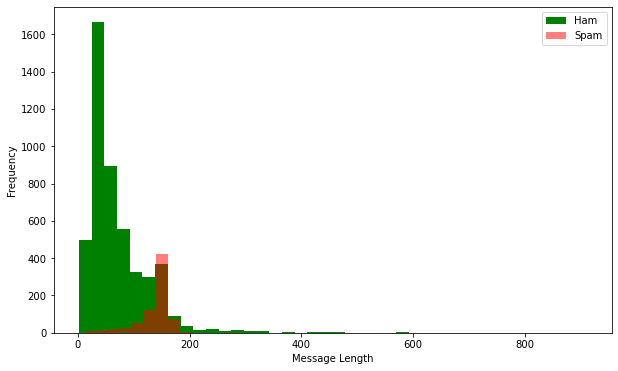

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

data[data.label=='ham'].msg_len.plot(bins=40, kind='hist', color='green', label='Ham', alpha=1)
data[data.label=='spam'].msg_len.plot( kind='hist', color='red', label='Spam', alpha=0.5)
plt.legend()
plt.xlabel("Message Length")

In [15]:
#Label in binary (ham = 0, spam = 1)
data['label_num'] = data.label.map({'ham':0, 'spam':1})

In [16]:
data

,label,message,msg_len,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,1
5568,ham,Will Ì_ b going to esplanade fr home?,37,0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,0
5570,ham,The guy did some bitching but I acted like i'd...,125,0


- spam messages tend to have more characters

# Task 3: Feature Extraction
## Hint : see lecture of week 6
* How can we handle text?
* Discuss possible features for a numerical repressentation!
* How can we obtain a compact and non-sparse representation?

See: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer

- use bag-of-words approach, where each unique word in a text will be represented by one number.

In [17]:
import nltk
import string
from nltk.corpus import stopwords
#remove puncuation and any extra stopwords
def m_text_process(mess):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [18]:
data['msg_clean'] = data['message'].apply(m_text_process)
data.head()

,label,message,msg_len,label_num,msg_clean
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,0,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,49,0,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,Nah think goes usf lives around though


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# bag-of-words (bow) approach, where each unique word in a text will be represented by one number
#bow = CountVectorizer(analyzer=m_text_process).fit(data['msg_clean'])

In [57]:
vectorizer = CountVectorizer()
#x_array = np.asarray(data['msg_clean'])
X = vectorizer.fit_transform(data['msg_clean'])
y = data['label_num']

In [58]:
msg_train, msg_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 4: Train a Random Forrest Model
* Train and evaluate the model using the approach from task 3
* Diskuss the results -> possible improovements?
* Use RF feature importance to see which features are driving the RF Decission

See: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [48]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from scipy.stats import randint

In [42]:
model_params = {
    "n_estimators": randint(4,200),
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
    'min_samples_leaf': randint(1,4),
    'min_samples_split': randint(2,9)
}

rf_model = rfc(class_weight='balanced', n_jobs=-1)

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=0)

In [43]:
model = clf.fit(msg_train, label_train)

In [44]:
#model.best_estimator_.get_params()
model.best_params_

{'max_depth': 110,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 181}

In [49]:
clf = model.best_estimator_
pred = clf.predict(msg_test)

In [50]:
print(classification_report(label_test, pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.86      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [51]:
confusion_matrix(pred, label_test)

array([[964,  21],
       [  1, 129]], dtype=int64)

### Precision-Recall

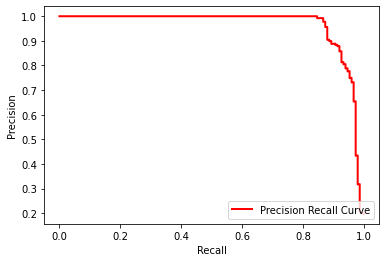

In [62]:
plt.figure()
#pseudo probability
pred_proba = clf.predict_proba(msg_test)
p, r, thresholds_prc = precision_recall_curve(label_test, pred_proba[:,1])

plt.plot(r, p, color="red", lw = 2, label= "Precision Recall Curve" )
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
plt.show()


### Find threshold

In [71]:
def find_threshold(p, r, t, des_p):
        for i in range(len(p)):
            if p[i] >= des_p:
                print("Desired Precicion: ", des_p)
                print("Threshold: ", t[i])
                print("Precision:", p[i])
                print("Recall: ", r[i])
                return

In [95]:
find_threshold(p,r,thresholds_prc, 1)

Desired Precicion:  1
Threshold:  0.5903868650524863
Precision: 1.0
Recall:  0.8466666666666667


In [96]:
find_threshold(p,r,thresholds_prc, 0.95)

Desired Precicion:  0.95
Threshold:  0.3830617404666883
Precision: 0.9565217391304348
Recall:  0.88


In [97]:
find_threshold(p,r,thresholds_prc, 0.90)

Desired Precicion:  0.9
Threshold:  0.32743495709331294
Precision: 0.9047619047619048
Recall:  0.8866666666666667


### Feature importance

In [79]:
feat_names = np.array(vectorizer.get_feature_names())
feat_importances = clf.feature_importances_

feat_importance_data = pd.DataFrame(list(zip(feat_names, feat_importances)), columns = ["Name", "Importance"])
feat_importance_data.head()

,Name,Importance
0,008704050406,0.000131
1,0089my,0.000034
2,0121,0.000124
3,01223585236,0.000301
4,01223585334,0.000000


<BarContainer object of 70 artists>

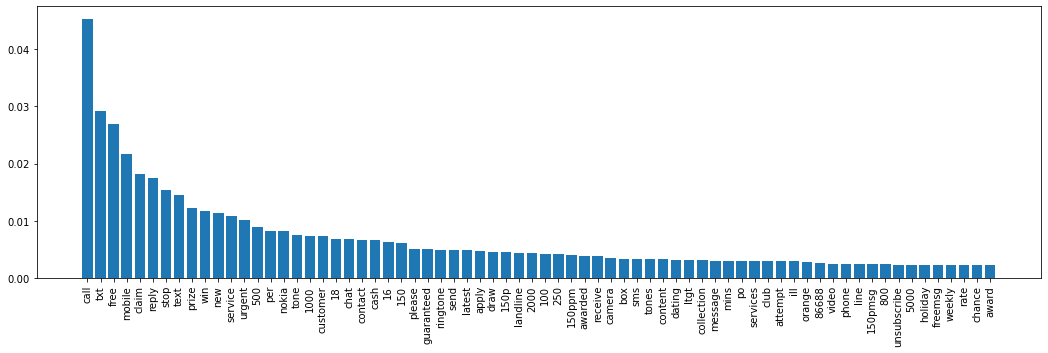

In [94]:
feat_importance_data.sort_values(by="Importance", ascending=False, inplace=True)
n=70
n_feat_names      = feat_importance_data.iloc[0:n]['Name'].values
n_feat_importances = feat_importance_data.iloc[0:n]['Importance'].values

fig, axs = plt.subplots(1, figsize=(18,5))
plt.xticks(rotation=90)
plt.bar(n_feat_names, n_feat_importances)

### Results / Improvments
- Precision: 1.0, Recall:  0.85, Threshold:  0.59 --> To improve the Recall score (right identified data, without False Positives) we have to reduce the precision score (threshold will be lower). 
- other improvements:  use other supervised NLP machine learning algorithms 

